In [54]:
import pandas as pd
import seaborn as sb
import os

In [55]:
df = pd.read_csv('BTC-USD.csv')
data = pd.read_csv('btc_sentiment_1.csv' , sep=';')

In [56]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
5,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
6,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800
7,2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500
8,2015-01-09,282.382996,291.114014,280.532990,290.407990,290.407990,18718600
9,2015-01-10,287.303009,288.127014,273.966003,274.795990,274.795990,15264300


In [57]:
df["Result"] = (df["Close"] - df["Open"])

filter_list = ['2022-01-19', '2022-01-20', '2022-02-09', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18']
all_the_dates = (df[df['Date'].isin(filter_list)])
all_the_dates1 = all_the_dates[["Date", "Result"]]
print(all_the_dates1)

data['date'] = data['date'].astype(str)
data['Date'] = data['date'].str[0:10]
data['time'] = data['date'].str[12:]

average_sentiment = (data.groupby([data['Date']], as_index=False)["sentiment"].mean())
print(average_sentiment)

concatenated = all_the_dates1.merge(average_sentiment, on='Date', how='left')
print(concatenated)




            Date       Result
2575  2022-01-19  -629.710938
2576  2022-01-20 -1063.609375
2596  2022-02-09   242.093750
2601  2022-02-14   429.519531
2602  2022-02-15  1988.738281
2603  2022-02-16  -616.417969
2604  2022-02-17 -3399.058594
2605  2022-02-18  -521.156250
         Date  sentiment
0  2022-01-19   0.159401
1  2022-01-20   0.176453
2  2022-02-09   0.160443
3  2022-02-14   0.204864
4  2022-02-15   0.212224
5  2022-02-16   0.168079
6  2022-02-17   0.194140
7  2022-02-18   0.189404
         Date       Result  sentiment
0  2022-01-19  -629.710938   0.159401
1  2022-01-20 -1063.609375   0.176453
2  2022-02-09   242.093750   0.160443
3  2022-02-14   429.519531   0.204864
4  2022-02-15  1988.738281   0.212224
5  2022-02-16  -616.417969   0.168079
6  2022-02-17 -3399.058594   0.194140
7  2022-02-18  -521.156250   0.189404


In [58]:
#sb.lineplot(x="Date", y="Result", hue="Low", data=all_the_dates1)

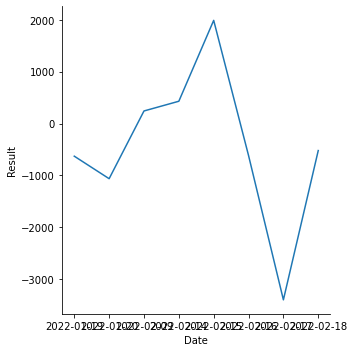

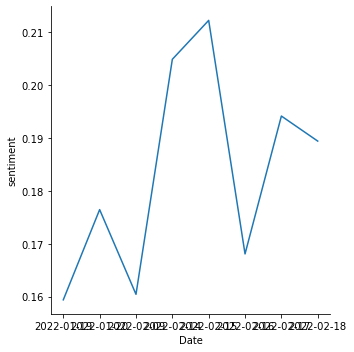

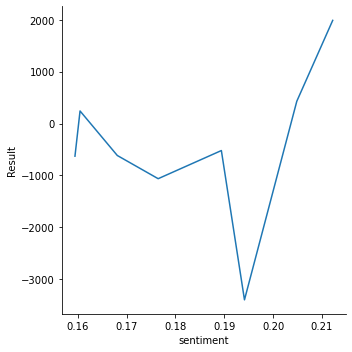

In [59]:
sb.relplot(x="Date", y="Result", kind="line", data=all_the_dates1)
sb.relplot(x="Date", y="sentiment", kind="line", data=average_sentiment)
sb.relplot(x="sentiment", y="Result", kind="line", data=concatenated)

            sentiment
Date                 
2022-01-23   0.173392
2022-01-30        NaN
2022-02-06        NaN
2022-02-13   0.160443
2022-02-20   0.194852
